### All Data: Consensus Genotype
Size_Sample_Deletions_AllData_1000

* Size Ranges
* Training Dataset size : 1000

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


***
Training Set

Count : 1000
*** 

In [2]:
# Import Training Data
df_train = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/DEL/del_samp_1000_train.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/DEL/del_samp_1000_train.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.head(1)

,GTconflict,GTcons,GTsupp,Ill250.GT,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,sample,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,type
0,-1,1,2,1.0,993.125,10.317108,24.0,447.041667,92.789852,23.0,...,28.0,0,0,HG002,0,0.0,49309987,1,1.0,Deletion


In [3]:
train_set = pd.DataFrame()
train_set = df_train_2

In [4]:
train_set['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
train_set['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
train_set['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)

** Count of Labels in Training Set **

<a id='imbalance'></a>

In [5]:
pd.value_counts(train_set['GTcons'].values, sort=False)

Homozygous_Reference    281
Heterozygous_Variant    468
Homozygous_Variant      251
dtype: int64

***
Test Set

Count : 3504
***

<a id='hom_ref'></a>

In [6]:
# Import Test Data
df_test = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/test/5k.DEL.test.csv')
df_test_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/test/5k.DEL.test.csv')
df_test.rename(columns={'size': 'Size'}, inplace=True)
df_test.shape

(3504, 187)

In [7]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

{'New_ID'}

In [8]:
### Drop columns that are not shared by both dataframes
df_train.drop(['Ill300x.GT'], axis=1, inplace = True)
df_train.drop(['Ill250.GT'], axis=1, inplace = True)
df_train.drop(['IllMP.GT'], axis=1, inplace = True)
df_train.drop(['TenX.GT'], axis=1, inplace = True)
df_train.drop(['pacbio.GT'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)

In [9]:
df_train.head(1)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1,993.125,10.317108,24.0,447.041667,92.789852,23.0,1.0,0.0,901.415842,...,9310.75,3465.027939,28.0,0,0,0,0.0,49309987,1,1.0


In [10]:
df_train['chrom'].replace('X', 23, inplace=True)
df_train['chrom'].replace('Y', 24, inplace=True)
df_test['chrom'].replace('X', 23, inplace=True)
df_test['chrom'].replace('Y', 24, inplace=True)

In [11]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

{'GTconflict',
 'GTsupp',
 'Ill250.GT',
 'Ill300x.GT',
 'IllMP.GT',
 'New_ID',
 'SVtype',
 'TenX.GT',
 'id',
 'pacbio.GT',
 'sample',
 'type'}

In [12]:
### Drop columns that are not shared by both dataframes
df_test.drop(['Ill300x.GT'], axis=1, inplace = True)
df_test.drop(['Ill250.GT'], axis=1, inplace = True)
df_test.drop(['IllMP.GT'], axis=1, inplace = True)
df_test.drop(['TenX.GT'], axis=1, inplace = True)
df_test.drop(['pacbio.GT'], axis=1, inplace = True)
df_test.drop(['GTconflict'], axis=1, inplace = True)
df_test.drop(['GTsupp'], axis=1, inplace = True)
df_test.drop(['sample'], axis=1, inplace = True)
df_test.drop(['SVtype'], axis=1, inplace = True)
df_test.drop(['type'], axis=1, inplace = True)
df_test.drop(['id'], axis=1, inplace = True)
df_test.drop(['New_ID'], axis=1, inplace = True)

***
Import '-1' Labeled Data (Unknown Data) 
*** 

In [13]:
# Import Test Data
# SVanalyzer generated training data
df_min1 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/min1_DFs/DEL/del_HG002_min1.csv')
df_min1_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/min1_DFs/DEL/del_HG002_min1.csv')
df_min1.rename(columns={'size': 'Size'}, inplace=True)
df_min1.drop(['New_ID'], axis=1, inplace = True)
df_min1.drop(['index'], axis=1, inplace = True)
df_min1.shape

(1241, 188)

In [14]:
df_min1['chrom'].replace('X', 23, inplace=True)
df_min1['chrom'].replace('Y', 24, inplace=True)

In [15]:
### Drop columns that are not shared by both dataframes
df_min1.drop(['Ill300x.GT'], axis=1, inplace = True)
df_min1.drop(['Ill250.GT'], axis=1, inplace = True)
df_min1.drop(['IllMP.GT'], axis=1, inplace = True)
df_min1.drop(['TenX.GT'], axis=1, inplace = True)
df_min1.drop(['pacbio.GT'], axis=1, inplace = True)
df_min1.drop(['GTconflict'], axis=1, inplace = True)
df_min1.drop(['GTsupp'], axis=1, inplace = True)
df_min1.drop(['sample'], axis=1, inplace = True)
df_min1.drop(['SVtype'], axis=1, inplace = True)
df_min1.drop(['type'], axis=1, inplace = True)
df_min1.drop(['id'], axis=1, inplace = True)

***
Impute missing values using KNN
***

In [16]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1,993.125,10.317108,24.0,447.041667,92.789852,23.0,1.0,0.0,901.415842,...,9310.75000,3465.027939,28.0,0,0,0,0.0,49309987,1,1.000000
1,1,988.500,14.047310,26.0,434.576923,101.027480,25.0,1.0,0.0,900.245810,...,11136.68182,2531.740497,22.0,0,0,0,0.0,104443199,1,0.034221
2,0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,898.721053,...,10733.81579,3772.996309,38.0,0,0,0,0.0,240699867,1,1.000000


In [17]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/1000 with 2 missing, elapsed time: 0.751
Imputing row 101/1000 with 0 missing, elapsed time: 0.763
Imputing row 201/1000 with 0 missing, elapsed time: 0.771
Imputing row 301/1000 with 2 missing, elapsed time: 0.777
Imputing row 401/1000 with 59 missing, elapsed time: 0.784
Imputing row 501/1000 with 3 missing, elapsed time: 0.792
Imputing row 601/1000 with 0 missing, elapsed time: 0.806
Imputing row 701/1000 with 3 missing, elapsed time: 0.810
Imputing row 801/1000 with 0 missing, elapsed time: 0.817
Imputing row 901/1000 with 0 missing, elapsed time: 0.831


In [18]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
dftrain_header = list(df_train.columns.values)
X.columns = dftrain_header
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1.0,993.125,10.317108,24.0,447.041667,92.789852,23.0,1.0,0.0,901.415842,...,9310.75000,3465.027939,28.0,0.0,0.0,0.0,0.0,49309987.0,1.0,1.000000
1,1.0,988.500,14.047310,26.0,434.576923,101.027480,25.0,1.0,0.0,900.245810,...,11136.68182,2531.740497,22.0,0.0,0.0,0.0,0.0,104443199.0,1.0,0.034221
2,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,898.721053,...,10733.81579,3772.996309,38.0,0.0,0.0,0.0,0.0,240699867.0,1.0,1.000000


In [19]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y = X['GTcons']

In [20]:
#Count the number of labels
pd.value_counts(Y.values, sort=False)

1.0    468
0.0    281
2.0    251
dtype: int64

In [21]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [22]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

** Train Random Forest Classifier **

<a id='multi_run'></a>

** Determine Number of trees: Out of Bag Error **

In [23]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3)

In [24]:
# Train Random Forest Classifier
model = RandomForestClassifier(oob_score=True) 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [25]:
print('The OOB prediction of accuracy is: {oob}%'.format(oob=model.oob_score_ * 100))

The OOB prediction of accuracy is: 91.14285714285715%


In [26]:
sns.set_style("white")

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py

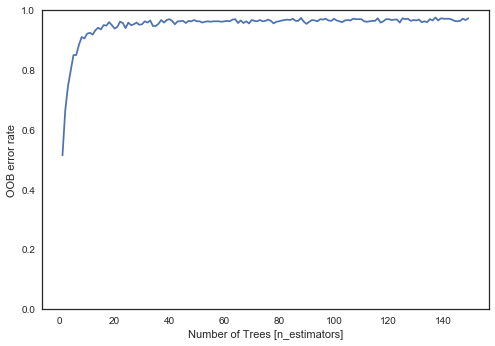

In [27]:
n_estimators = 150
trees = []
oob = []
for i in range(1, n_estimators):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    trees += [i]
    oob += [model.oob_score_] 
    
    
df_oob = pd.DataFrame()
df_oob['trees'] = trees
df_oob['oob'] = oob


plt.plot(trees, oob)

plt.xlabel("Number of Trees [n_estimators]")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.ylim(0, 1.0)
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/del_alldata_1000_trees_oob_60.png', bbox_inches='tight')
plt.show()

** Train Model Using Optimal Tuning Parameters**

In [28]:
model = RandomForestClassifier(n_estimators=60, random_state=4, class_weight="balanced") 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

In [29]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



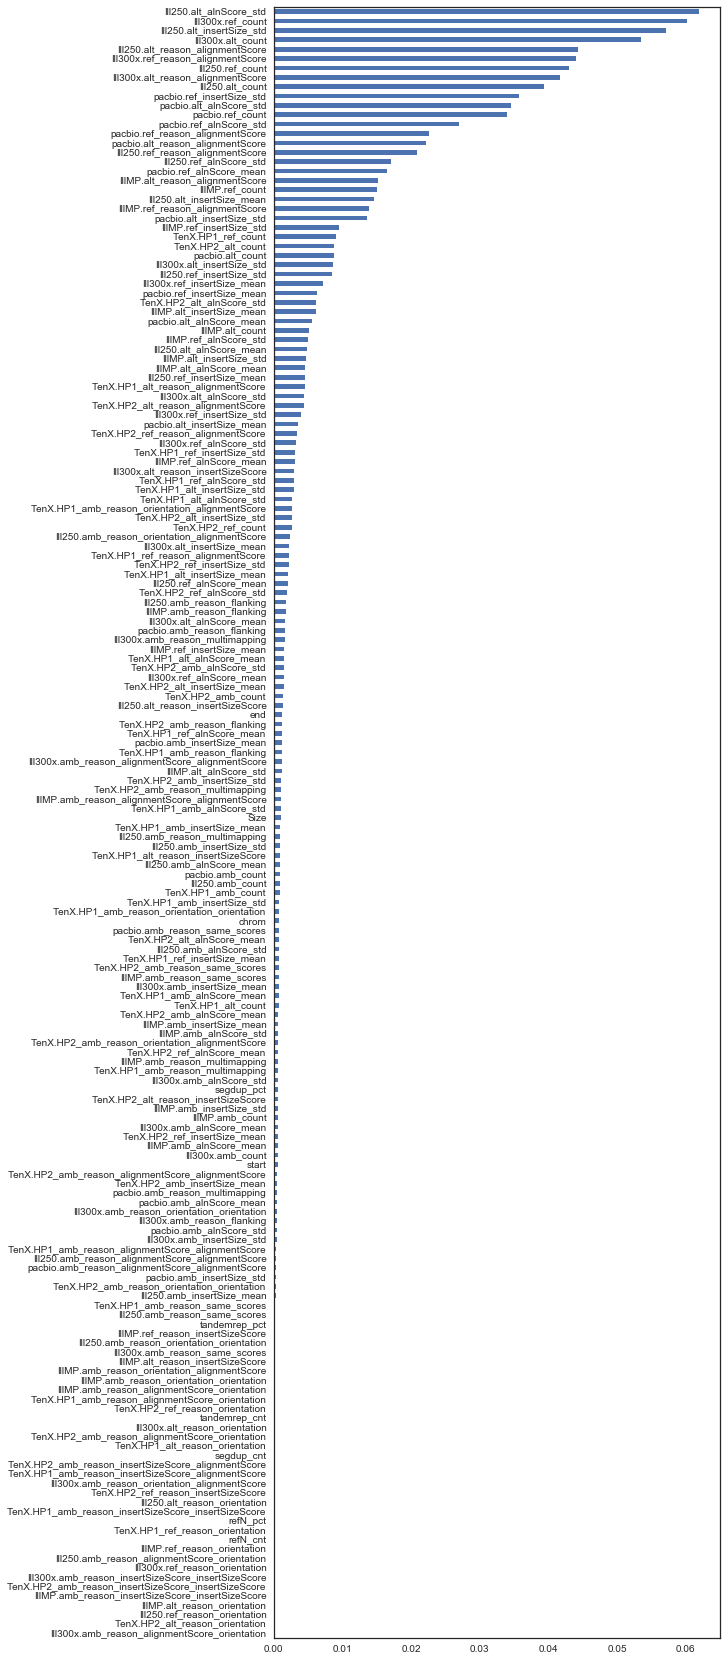

In [30]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(8,30))
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/del_alldata_1000_featImp_60.png', bbox_inches='tight')
plt.show()


In [31]:
feature_importances.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/dataframes/del_alldata_1000_featImp.csv')

In [32]:
X_ = X4[['Ill250.alt_alnScore_std','Ill300x.ref_count','Ill250.alt_insertSize_std','Ill300x.alt_count','Ill250.alt_reason_alignmentScore','Ill300x.ref_reason_alignmentScore','Ill250.ref_count','Ill300x.alt_reason_alignmentScore','Ill250.alt_count','pacbio.ref_insertSize_std','pacbio.alt_alnScore_std','pacbio.ref_count','pacbio.ref_alnScore_std','pacbio.ref_reason_alignmentScore','pacbio.alt_reason_alignmentScore','Ill250.ref_reason_alignmentScore','Ill250.ref_alnScore_std','pacbio.ref_alnScore_mean','IllMP.alt_reason_alignmentScore','IllMP.ref_count','Ill250.alt_insertSize_mean','IllMP.ref_reason_alignmentScore','pacbio.alt_insertSize_std','IllMP.ref_insertSize_std','TenX.HP1_ref_count']]

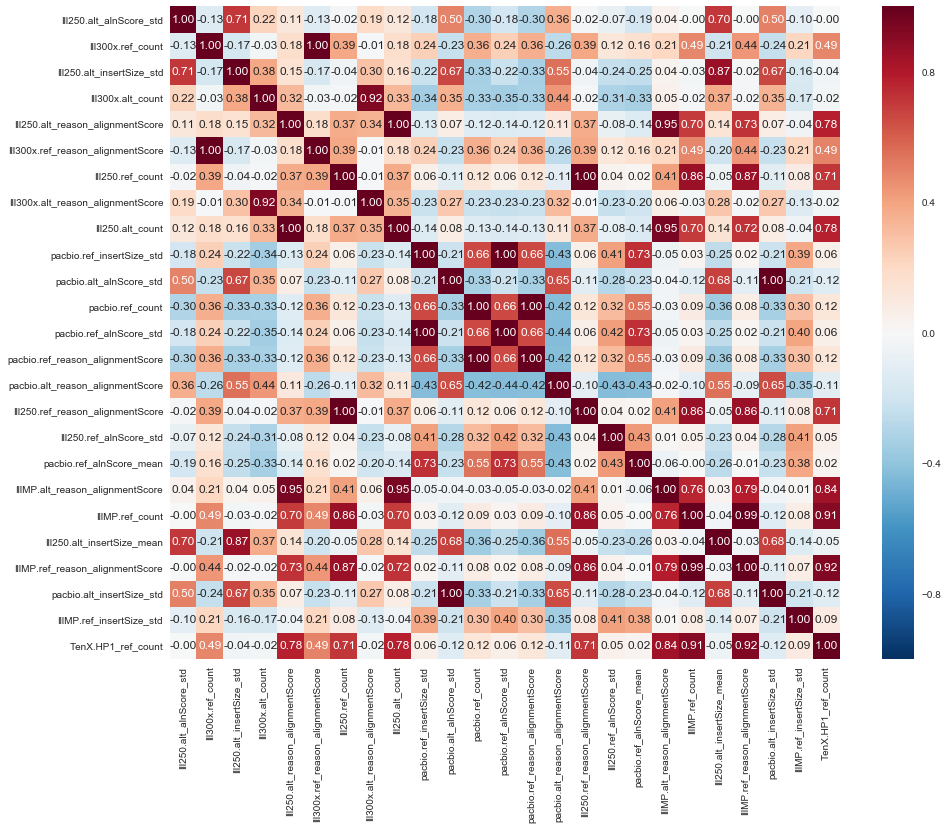

In [33]:
plt.figure(figsize=(15, 12))
sns.heatmap(X_.corr(), annot=True, fmt=".2f")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/del_alldata_1000_heatmap_60.png', bbox_inches='tight')
plt.show()

In [34]:
pred = model.predict(X_test)

In [35]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(y_test, pred, average='micro'))) 
from sklearn.metrics import accuracy_score
print('Accuracy score of the training subset: {:.3f}'.format(accuracy_score(y_test, pred))) 

Precision score of the training subset: 0.977
Accuracy score of the training subset: 0.977


In [36]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
labels = pd.DataFrame(y_test)

In [37]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_train['GTcons']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']

In [38]:
df_Xtest['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [39]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

Homozygous_Reference     88
Heterozygous_Variant    133
Homozygous_Variant       79
dtype: int64

In [40]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

Homozygous_Reference     87
Heterozygous_Variant    137
Homozygous_Variant       76
dtype: int64

In [41]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[132   0   1]
 [  2  86   0]
 [  3   1  75]]


In [42]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,132,0,1,133
Homozygous_Reference,2,86,0,88
Homozygous_Variant,3,1,75,79
All,137,87,76,300


In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.96      0.99      0.98       133
Homozygous_Reference       0.99      0.98      0.98        88
  Homozygous_Variant       0.99      0.95      0.97        79

         avg / total       0.98      0.98      0.98       300



***
Predict

Predict labels for test set
***

** Load Data **

In [44]:
df_test.drop(['GTcons'],axis=1, inplace=True)
X2 = df_test

** Impute missing values using KNN **

In [45]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/3504 with 0 missing, elapsed time: 10.766
Imputing row 101/3504 with 0 missing, elapsed time: 10.783
Imputing row 201/3504 with 0 missing, elapsed time: 10.794
Imputing row 301/3504 with 0 missing, elapsed time: 10.809
Imputing row 401/3504 with 1 missing, elapsed time: 10.822
Imputing row 501/3504 with 0 missing, elapsed time: 10.829
Imputing row 601/3504 with 0 missing, elapsed time: 10.845
Imputing row 701/3504 with 0 missing, elapsed time: 10.859
Imputing row 801/3504 with 59 missing, elapsed time: 10.866
Imputing row 901/3504 with 0 missing, elapsed time: 10.876
Imputing row 1001/3504 with 1 missing, elapsed time: 10.883
Imputing row 1101/3504 with 3 missing, elapsed time: 10.898
Imputing row 1201/3504 with 1 missing, elapsed time: 10.909
Imputing row 1301/3504 with 0 missing, elapsed time: 10.919
Imputing row 1401/3504 with 1 missing, elapsed time: 10.942
Imputing row 1501/3504 with 0 missing, elapsed time: 10.959
Imputing row 1601/3504 with 3 missing, elapsed time

In [46]:
df_test_header = list(df_test.columns.values)
X2.columns = df_test_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,980.534884,24.312260,43.0,444.790698,85.191046,42.0,1.0,0.0,863.292398,160.008066,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,95498964.0,1.0,0.117089
1,982.200000,12.175385,25.0,419.560000,60.020716,25.0,0.0,0.0,850.880000,170.692781,...,8671.60,3889.530045,15.0,0.0,0.0,1.0,1.0,14399929.0,1.0,1.000000
2,983.179487,5.750682,39.0,397.512820,75.999957,39.0,0.0,0.0,907.336634,141.925150,...,10437.35,3673.796705,20.0,0.0,0.0,0.0,0.0,76766532.0,0.0,0.000000


In [47]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,980.534884,24.312260,43.0,444.790698,85.191046,42.0,1.0,0.0,863.292398,160.008066,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,95498964.0,1.0,0.117089
1,982.200000,12.175385,25.0,419.560000,60.020716,25.0,0.0,0.0,850.880000,170.692781,...,8671.60,3889.530045,15.0,0.0,0.0,1.0,1.0,14399929.0,1.0,1.000000
2,983.179487,5.750682,39.0,397.512820,75.999957,39.0,0.0,0.0,907.336634,141.925150,...,10437.35,3673.796705,20.0,0.0,0.0,0.0,0.0,76766532.0,0.0,0.000000


In [48]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [49]:
pred = model.predict(X5)
pred_prob = model.predict_proba(X5)
pred_prob_log = model.predict_log_proba(X5)

In [50]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_2['chrom']
X5['GTcons'] = df_test_2['GTcons']
X5['start'] = df_test_2['start']
X5['end'] = df_test_2['end']
X5['Size'] = df_test_2['Size']
X5['GTsupp'] = df_test_2['GTsupp']

In [51]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/dataframes/df_alldata_1000_df1_60.csv', index=False)

In [52]:
X6 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/dataframes/df_alldata_1000_df1_60.csv')

In [53]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [54]:
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/dataframes/df_alldata_1000_df2_60.csv')

In [55]:
X6['GTcons'].dtypes

dtype('int64')

In [56]:
# Drop NaN Labels
X6 = X6[np.isfinite(X6['GTcons'])]
X6 = X6[np.isfinite(X6['predicted_GTcons_label'])]

***
Label Analysis
***

In [57]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[ 878   41    2]
 [   3 1884   25]
 [   1   31  639]]


In [58]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [59]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.971
Accuracy score of the prediction subset: 0.971


In [60]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1884,3,25,1912
Homozygous_Reference,41,878,2,921
Homozygous_Variant,31,1,639,671
All,1956,882,666,3504


In [61]:
conf_mat = pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)
conf_mat.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/dataframes/1000_confMatrix_60.csv')

** Labels with Pred_Prob >=0.9 **

In [62]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]

In [63]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1523,0,0,1523
Homozygous_Reference,0,639,0,639
Homozygous_Variant,0,0,468,468
All,1523,639,468,2630


In [64]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
conf_mat = pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)
conf_mat.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/dataframes/1000_confMatrix_hi_60.csv')

In [65]:
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00      1523
Homozygous_Reference       1.00      1.00      1.00       639
  Homozygous_Variant       1.00      1.00      1.00       468

         avg / total       1.00      1.00      1.00      2630



***
Predict

Predict labels for minus 1 (unknown label) set
***

** Load Data **

In [ ]:
df_min1.drop(['GTcons'],axis=1, inplace=True)
X2 = df_min1

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_min1_header = list(df_min1.columns.values)
X2.columns = df_min1_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [ ]:
pred = model.predict(X5)
pred_prob = model.predict_proba(X5)
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df_min1_2['chrom']
X5['GTcons'] = df_min1_2['GTcons']
X5['start'] = df_min1_2['start']
X5['end'] = df_min1_2['end']
X5['Size'] = df_min1_2['Size']
X5['GTsupp'] = df_min1_2['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/dataframes/df_alldata_1000_min1_df1_60.csv', index=False)

In [ ]:
X6 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/dataframes/df_alldata_1000_min1_df1_60.csv')

In [ ]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [ ]:
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/1000_train/dataframes/df_alldata_1000_min1_df2_60.csv')